In [14]:
import re
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import itertools
import scipy
from sklearn.linear_model import LogisticRegression
import operator

# Reading the Facebook Graph

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(0.0, 1.0, 0.0, 1.0)

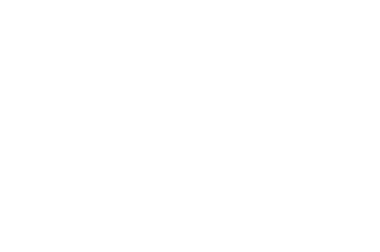

In [2]:
g = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(g))
sp=nx.spring_layout(g)
plt.axis('off')

# Processing the embeddings from Node2Vec

In [3]:
all_values = pd.read_csv('facebook.emd')['4039 128'].values
fb_dict = {'node_id': [], 'embedding': []}

for v in all_values:
    v_split = [float(x) for x in v.split(' ')]
    fb_dict['embedding'] += [v_split[1:]]
    fb_dict['node_id'] += [int(v_split[0])]

fb_df = pd.DataFrame.from_dict(fb_dict)

In [4]:
fb_df.head()

,node_id,embedding
0,3437,"[-0.03462, 0.14721, 0.085802, -0.023518, -0.28..."
1,107,"[0.278259, 0.203138, 0.176665, 0.045982, -0.14..."
2,1684,"[0.357548, -0.144361, 0.40464, 0.335708, -0.14..."
3,0,"[-0.089028, -0.028927, -0.02356, -0.340999, 0...."
4,1912,"[-0.173345, 0.266669, 0.301875, -0.135857, -0...."


# Bridges

In [5]:
bridges = list(nx.bridges(g))
bridges

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


In [6]:
list(fb_df['embedding'].values())

TypeError: 'numpy.ndarray' object is not callable

In [7]:
bridges_len = len(bridges)
bridge_heavy_nodes = []
for i in range(bridges_len):
    node = bridges[i][0]
    if node not in bridge_heavy_nodes:
        bridge_heavy_nodes.append(node)
bridge_heavy_nodes

[0, 107, 348, 414, 1684, 1912, 3437, 3980, 686, 698]

In [24]:
def k_embeddings(ks):
    #takes list of k and returns list of embeddings those of k
    embeddings = []
    for k in ks:
        embeddings.append(fb_df['embedding'][k])
    return embeddings

def random_k_embeddings(k, excl):
    #returns list of random k number of embeddings that is not part of excl list
    random_k = []
    while len(random_k) < k:
        i = random.randint(0, 4038)
        if i not in random_k and i not in excl:
            random_k.append(i)
    return k_embeddings(random_k)

In [9]:
list(itertools.chain.from_iterable(random_k_embeddings(2)))

[-0.281846,
 0.240773,
 0.045963,
 0.233377,
 -0.280018,
 0.395678,
 0.057492,
 -0.042242,
 0.355128,
 0.290688,
 -0.10035,
 0.173991,
 -0.309717,
 0.153053,
 0.448754,
 -0.507449,
 0.222133,
 -0.834348,
 0.288143,
 -0.289728,
 0.210654,
 0.41466,
 0.077397,
 0.279276,
 0.185451,
 0.223583,
 -0.266746,
 -0.118527,
 0.262109,
 -0.047625,
 0.257861,
 -0.15817,
 -0.372912,
 -0.003626,
 -0.112818,
 0.103481,
 -0.720794,
 -0.327037,
 0.124685,
 0.008429,
 0.114356,
 -0.211713,
 0.315898,
 0.083892,
 0.674985,
 -4.8e-05,
 -0.087863,
 -0.484485,
 0.024581,
 -0.518194,
 0.068063,
 0.134403,
 -0.383028,
 0.482647,
 -0.05717,
 0.46593,
 0.059255,
 -0.377793,
 -0.192623,
 -0.52848,
 -0.226976,
 -0.311029,
 0.34964,
 0.109177,
 -0.118434,
 -0.658078,
 0.223925,
 -0.005937,
 0.282814,
 -0.22654,
 0.143361,
 0.13663,
 0.753321,
 -0.647192,
 -0.210174,
 -0.140862,
 0.067213,
 0.092141,
 0.012071,
 -0.371589,
 0.327843,
 0.029191,
 -0.43905,
 0.423207,
 0.2909,
 0.446412,
 -0.115756,
 0.054353,
 0.228

In [25]:
scipy.stats.ttest_ind(list(itertools.chain.from_iterable(k_embeddings(bridge_heavy_nodes))), list(itertools.chain.from_iterable(random_k_embeddings(len(bridge_heavy_nodes), bridge_heavy_nodes))))

Ttest_indResult(statistic=0.10012179743437591, pvalue=0.920255476315259)

In [11]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X=list(itertools.chain.from_iterable(random_k_embeddings(len(bridge_heavy_nodes)))), [0])

SyntaxError: positional argument follows keyword argument (<ipython-input-11-4973d5ff8636>, line 1)

In [12]:
closeness = nx.closeness_centrality(g)

In [13]:
closeness

{0: 0.35334266713335666,
 1: 0.2613761408505405,
 2: 0.26125776397515527,
 3: 0.2613761408505405,
 4: 0.26125776397515527,
 5: 0.2613084837895554,
 6: 0.26119016817593793,
 7: 0.2747686445291236,
 8: 0.2612239617026782,
 9: 0.2620546433902265,
 10: 0.26125776397515527,
 11: 0.26110572259941806,
 12: 0.26110572259941806,
 13: 0.26161321671525756,
 14: 0.2613423079412336,
 15: 0.26110572259941806,
 16: 0.2612408617454875,
 17: 0.2613084837895554,
 18: 0.26110572259941806,
 19: 0.2613592233009709,
 20: 0.2613423079412336,
 21: 0.2756125861715924,
 22: 0.2612746683921061,
 23: 0.2613761408505405,
 24: 0.2613592233009709,
 25: 0.26225888160031174,
 26: 0.26224184959085595,
 27: 0.2611732746911584,
 28: 0.2613084837895554,
 29: 0.2613084837895554,
 30: 0.2613761408505405,
 31: 0.2614776921582594,
 32: 0.26119016817593793,
 33: 0.26112260734609416,
 34: 0.3033125516412529,
 35: 0.26112260734609416,
 36: 0.2612746683921061,
 37: 0.26110572259941806,
 38: 0.2612408617454875,
 39: 0.261342307941

In [16]:
sorted_closeness = sorted(closeness.items(), key=operator.itemgetter(1), reverse=True)
sorted_closeness

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739),
 (414, 0.3695433330282786),
 (376, 0.36655773420479304),
 (475, 0.3661920740001814),
 (566, 0.36496746203904556),
 (1666, 0.3647037572254335),
 (1534, 0.36460496613995486),
 (484, 0.3631621548700423),
 (353, 0.36309684380901),
 (1171, 0.3624450228884301),
 (651, 0.36228243315987796),
 (420, 0.3610192221725525),
 (1085, 0.35785182559376105),
 (1687, 0.35725028753428295),
 (1577, 0.35718708536045995),
 (1718, 0.3566507684154743),
 (1165, 0.3564933345104617),
 (1136, 0.3563045971940351),
 (1465, 0.35461491174145954),
 (0, 0.35334266713335666),
 (1912, 0.35094733182687293),
 (580, 0.34503973340169186),
 (1505, 0.34275528393175453),
 (1405, 0.3424936386768448),
 (1656, 0.3420294765373539),
 (990, 0.34188468376936754),
 (1642, 0.3418557399254995),
 (1758, 0.3418268009

In [18]:
def top_k_closeness(k):
    #take 0<k<1 (percentage) returns top k% closeness list of nodes
    num = int(k * 4038)
    top_k = []
    for i in range(num):
        top_k.append(sorted_closeness[i][0])
    return top_k

top_k_closeness(0.05)

[107,
 58,
 428,
 563,
 1684,
 171,
 348,
 483,
 414,
 376,
 475,
 566,
 1666,
 1534,
 484,
 353,
 1171,
 651,
 420,
 1085,
 1687,
 1577,
 1718,
 1165,
 1136,
 1465,
 0,
 1912,
 580,
 1505,
 1405,
 1656,
 990,
 1642,
 1758,
 1419,
 1450,
 1726,
 517,
 366,
 606,
 526,
 641,
 1663,
 1352,
 1173,
 1420,
 601,
 1835,
 1361,
 1376,
 1126,
 1621,
 1536,
 1358,
 1013,
 1029,
 1574,
 925,
 1320,
 1522,
 1545,
 1237,
 1688,
 1179,
 1692,
 1509,
 1374,
 916,
 1074,
 1313,
 930,
 1334,
 1289,
 1098,
 1300,
 1549,
 1593,
 1070,
 1317,
 1425,
 1555,
 1617,
 1512,
 1193,
 1360,
 1825,
 1806,
 1511,
 1778,
 1740,
 1553,
 1590,
 921,
 1777,
 1274,
 1217,
 1114,
 1567,
 1369,
 1307,
 1408,
 1866,
 1446,
 1702,
 1312,
 1705,
 1494,
 1847,
 1178,
 1338,
 1803,
 1421,
 1588,
 1210,
 1410,
 1187,
 1328,
 1540,
 1537,
 1719,
 1077,
 1182,
 1618,
 1088,
 1109,
 1483,
 1518,
 1226,
 962,
 1513,
 1523,
 915,
 1028,
 1782,
 1485,
 1327,
 1846,
 1808,
 1745,
 1863,
 1909,
 1911,
 1626,
 1440,
 1883,
 1458,
 185

In [19]:
k_embeddings(top_k_closeness(0.05))

[[-0.004873,
  -0.018595,
  -0.027876,
  -0.275633,
  -0.043666,
  -0.32193,
  -0.209048,
  -0.637584,
  0.358841,
  0.019659,
  0.29968,
  -0.330096,
  -0.098617,
  -0.236731,
  0.173171,
  -0.619209,
  0.456557,
  -0.03108,
  -0.009178,
  -0.601505,
  0.124444,
  0.075042,
  -0.057408,
  0.600542,
  -0.179205,
  -0.505922,
  -0.231489,
  -0.773567,
  -0.368417,
  -0.253896,
  0.624604,
  0.271432,
  -0.070803,
  -0.572428,
  0.154715,
  0.212917,
  -0.401101,
  0.04156,
  0.531911,
  -0.001462,
  -0.243962,
  0.219369,
  0.021711,
  0.111038,
  -0.231819,
  0.023018,
  -0.094803,
  -0.229828,
  -0.201232,
  0.002143,
  0.09441,
  0.259148,
  0.029853,
  0.282816,
  0.35443,
  -0.320766,
  -0.135092,
  -0.133996,
  -0.715016,
  0.126207,
  0.127871,
  -0.234953,
  0.085302,
  0.138911,
  0.282835,
  -0.03133,
  0.059873,
  -0.664255,
  0.575129,
  -0.199332,
  0.179424,
  0.341718,
  0.858247,
  -0.339067,
  0.203547,
  -0.816897,
  0.358983,
  -0.240889,
  0.186433,
  -0.105184,
  0.

In [33]:
scipy.stats.ttest_ind(list(itertools.chain.from_iterable(k_embeddings(top_k_closeness(0.05)))), list(itertools.chain.from_iterable(random_k_embeddings(len(top_k_closeness(0.05)), top_k_closeness(0.05)))))

Ttest_indResult(statistic=-0.4576851511493469, pvalue=0.6471805900974676)